# Foodie Project

**Business case:** There will be a foodie fair in your city next summer, and the organsers have contacted us because they are interested in performing an analysis of the world wide cuisines. They manage to obtain a dataset from different cuisines all over the world, together with the list of the most common ingredients.

Some of our strongest geographic and cultural associations are tied to a region's local foods, so they are interested to know more information regarding them in order to organise the different stands.

In [11]:
import json
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Other imports
from collections import Counter
import requests
import imageio
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from PIL import Image


In [ ]:
import sys
sys.path.insert(0, 'D:/Data Course/Functions')

from My_functions_EDA import *
from fx_MLRegression import *

In [12]:
# Add the name of the file
data=json.load(open(r'../dataset/Ex 6.1. foodie_dataset.json'))

# and load it
#file = open(filename, 'rt')
#text = file.read()
#file.close()



In [13]:
df = pd.DataFrame(data)

In [14]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [15]:
df.ingredients

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [16]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [17]:
#Missing values in training set
print(df.isnull().sum())
print(df.info())

id             0
cuisine        0
ingredients    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB
None


# Exploring cuisine column

<AxesSubplot:ylabel='cuisine'>

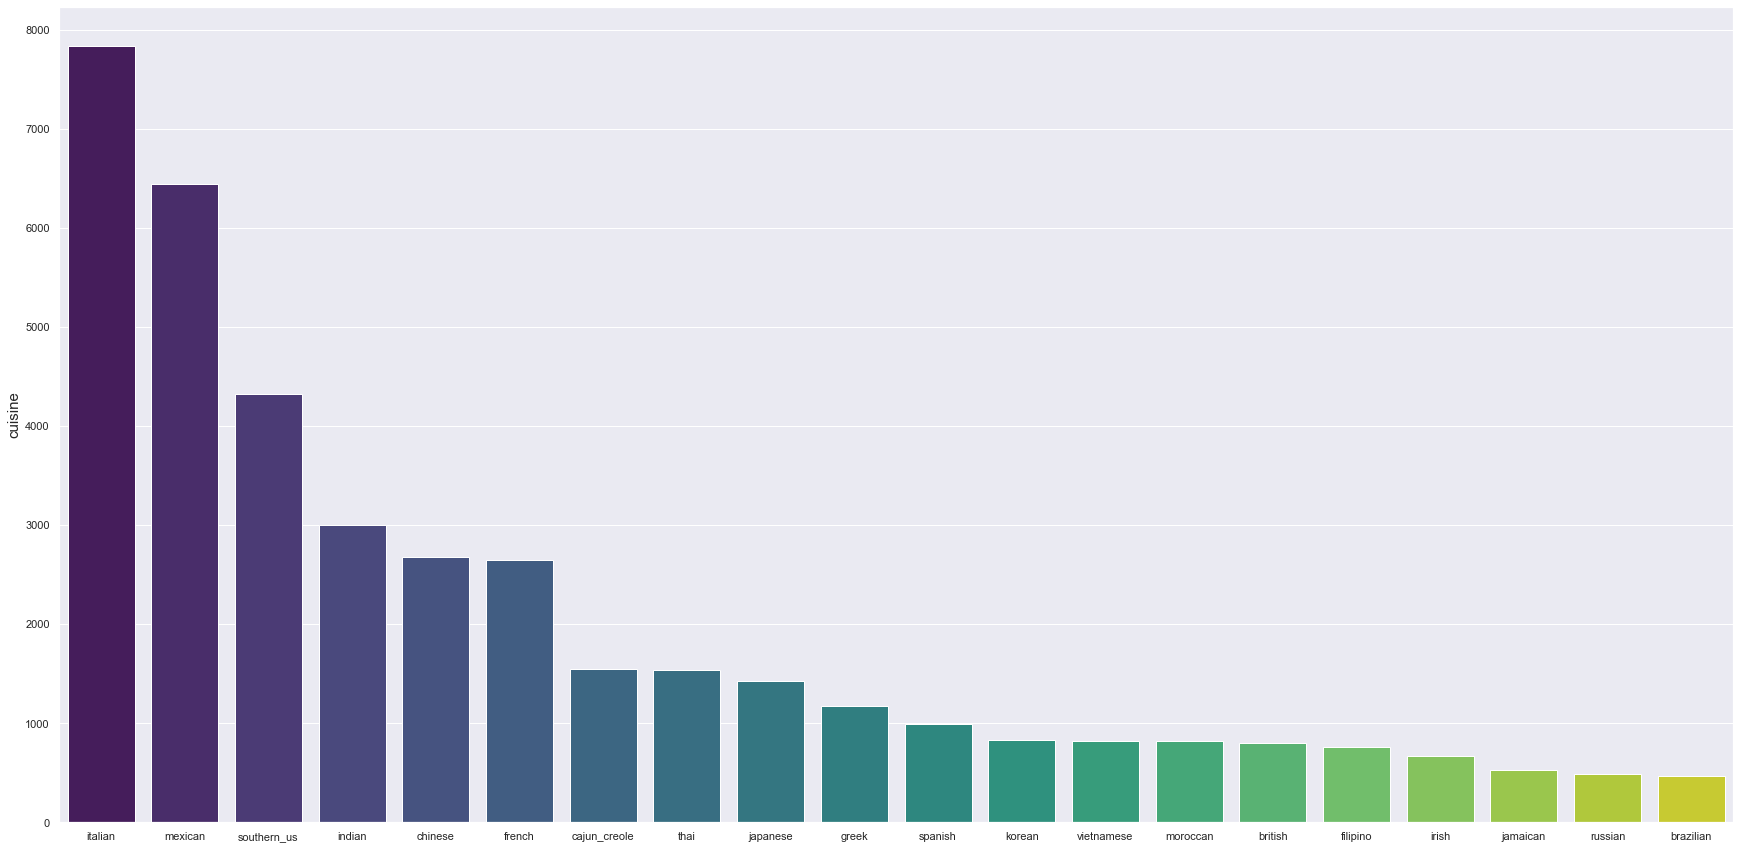

In [18]:
sns.set(rc={'figure.figsize':(30,15),
            'axes.labelsize': 15, 
            'font.size': 15, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(df['cuisine'].value_counts().index,
            df['cuisine'].value_counts(),palette='viridis')

In [19]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [20]:
df['clean'] = df.ingredients.apply(', '.join)
df['clean'] = df['clean'].str.replace(',',' hola')

In [21]:
type(df.clean[0])

str

In [22]:
from collections import Counter

vocab = Counter()
for recipe in df['clean']:
    for word in recipe.split('hola'):
        vocab[word] += 1

In [23]:
vocab.most_common(100)

[(' salt ', 15161),
 (' garlic ', 6583),
 (' olive oil ', 6543),
 (' onions ', 6060),
 (' water ', 5846),
 (' garlic cloves ', 5040),
 (' sugar ', 4743),
 (' ground black pepper ', 4085),
 (' butter ', 4061),
 (' vegetable oil ', 3887),
 (' all-purpose flour ', 3733),
 (' pepper ', 3444),
 (' green onions ', 2783),
 (' large eggs ', 2506),
 (' salt', 2498),
 (' soy sauce ', 2473),
 (' eggs ', 2430),
 (' kosher salt ', 2415),
 (' tomatoes ', 2321),
 (' unsalted butter ', 2320),
 (' extra-virgin olive oil ', 2286),
 (' carrots ', 2262),
 (' ground cumin ', 2077),
 (' black pepper ', 2068),
 (' onions', 1899),
 (' chili powder ', 1882),
 (' milk ', 1754),
 (' purple onion ', 1667),
 (' sesame oil ', 1637),
 (' ginger ', 1628),
 (' grated parmesan cheese ', 1598),
 ('sugar ', 1590),
 (' oil ', 1587),
 (' red bell pepper ', 1547),
 (' scallions ', 1540),
 (' baking powder ', 1521),
 (' jalapeno chilies ', 1514),
 (' diced tomatoes ', 1490),
 ('water ', 1446),
 (' corn starch ', 1372),
 (' c

In [24]:
count_vectorizer = CountVectorizer(max_features = 1500)
train_vectors = count_vectorizer.fit_transform(df['clean'])
#pred_vectors = count_vectorizer.transform(pred["text2"])
train_vectors
#pred_vectors

<39774x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 797381 stored elements in Compressed Sparse Row format>

In [25]:
df.clean

0        romaine lettuce hola black olives hola grape t...
1        plain flour hola ground pepper hola salt hola ...
2        eggs hola pepper hola salt hola mayonaise hola...
3            water hola vegetable oil hola wheat hola salt
4        black pepper hola shallots hola cornflour hola...
                               ...                        
39769    light brown sugar hola granulated sugar hola b...
39770    KRAFT Zesty Italian Dressing hola purple onion...
39771    eggs hola citrus fruit hola raisins hola sourd...
39772    boneless chicken skinless thigh hola minced ga...
39773    green chile hola jalapeno chilies hola onions ...
Name: clean, Length: 39774, dtype: object

In [35]:
# No need to remove stopwords here because the TfidfVectorizer we'll do it for us
def clean_text(text):
    words = [word.lower() for word in text if word.isalpha()]
    return (" ").join(words)

In [36]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

In [37]:
df['ingredients'] = df['ingredients'].apply(lambda x: clean_text(x))

In [38]:
df['tokenized_text']=df['clean'].apply(lambda row : tokenize(row.lower()))
df.head()

,id,cuisine,ingredients,clean,tokenized_text
0,10259,greek,garlic pepper seasoning,romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ..."
1,25693,southern_us,salt tomatoes thyme eggs milk,plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal..."
2,20130,filipino,eggs pepper salt mayonaise butter,eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai..."
3,22213,indian,water wheat salt,water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol..."
4,13162,indian,shallots cornflour onions milk butter salt wat...,black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou..."


In [39]:
def remove_stopwords(text):
    stopwords=nltk.corpus.stopwords.words('english')

    clean_text=[word for word in text if word not in stopwords]
    return clean_text 


In [40]:
df['w_stop']=df['tokenized_text'].apply(lambda row : remove_stopwords(row))

In [41]:
df

,id,cuisine,ingredients,clean,tokenized_text,w_stop
0,10259,greek,garlic pepper seasoning,romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ..."
1,25693,southern_us,salt tomatoes thyme eggs milk,plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal..."
2,20130,filipino,eggs pepper salt mayonaise butter,eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai..."
3,22213,indian,water wheat salt,water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol..."
4,13162,indian,shallots cornflour onions milk butter salt wat...,black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou..."
...,...,...,...,...,...,...
39769,29109,irish,butter salt,light brown sugar hola granulated sugar hola b...,"[light, brown, sugar, hola, granulated, sugar,...","[light, brown, sugar, hola, granulated, sugar,..."
39770,11462,italian,rotini,KRAFT Zesty Italian Dressing hola purple onion...,"[kraft, zesty, italian, dressing, hola, purple...","[kraft, zesty, italian, dressing, hola, purple..."
39771,2238,irish,eggs raisins flour sugar salt milk butter,eggs hola citrus fruit hola raisins hola sourd...,"[eggs, hola, citrus, fruit, hola, raisins, hol...","[eggs, hola, citrus, fruit, hola, raisins, hol..."
39772,41882,chinese,peanuts flour scallions vodka broccoli sugar oil,boneless chicken skinless thigh hola minced ga...,"[boneless, chicken, skinless, thigh, hola, min...","[boneless, chicken, skinless, thigh, hola, min..."


In [23]:
import nltk


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
def lemmatizer2(tokenized_text):
    lematize_text=[lemmatizer.lemmatize(word) for word in tokenized_text]
    return lematize_text

In [25]:
df['lemmatizer_text']=df['w_stop'].apply(lambda row : lemmatizer2(row))
df.head()

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olive, hola, g..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol..."
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour..."


In [26]:
type(df.lemmatizer_text[35563])

list

In [27]:
df['final'] = df.lemmatizer_text.apply(' '.join)


In [28]:
df[df.final.str.contains('chicken')]

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text,final
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais...",egg hola pepper hola salt hola mayonaise hola ...
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour...",black pepper hola shallot hola cornflour hola ...
14,31908,italian,"[fresh parmesan cheese, butter, all-purpose fl...",fresh parmesan cheese hola butter hola all-pur...,"[fresh, parmesan, cheese, hola, butter, hola, ...","[fresh, parmesan, cheese, hola, butter, hola, ...","[fresh, parmesan, cheese, hola, butter, hola, ...",fresh parmesan cheese hola butter hola purpose...
17,1420,italian,"[italian seasoning, broiler-fryer chicken, may...",italian seasoning hola broiler-fryer chicken h...,"[italian, seasoning, hola, broiler, fryer, chi...","[italian, seasoning, hola, broiler, fryer, chi...","[italian, seasoning, hola, broiler, fryer, chi...",italian seasoning hola broiler fryer chicken h...
19,8152,vietnamese,"[soy sauce, vegetable oil, red bell pepper, ch...",soy sauce hola vegetable oil hola red bell pep...,"[soy, sauce, hola, vegetable, oil, hola, red, ...","[soy, sauce, hola, vegetable, oil, hola, red, ...","[soy, sauce, hola, vegetable, oil, hola, red, ...",soy sauce hola vegetable oil hola red bell pep...
...,...,...,...,...,...,...,...,...
39754,27082,vietnamese,"[jasmine rice, bay leaves, sticky rice, rotiss...",jasmine rice hola bay leaves hola sticky rice ...,"[jasmine, rice, hola, bay, leaves, hola, stick...","[jasmine, rice, hola, bay, leaves, hola, stick...","[jasmine, rice, hola, bay, leaf, hola, sticky,...",jasmine rice hola bay leaf hola sticky rice ho...
39761,6487,chinese,"[honey, chicken breast halves, cilantro leaves...",honey hola chicken breast halves hola cilantro...,"[honey, hola, chicken, breast, halves, hola, c...","[honey, hola, chicken, breast, halves, hola, c...","[honey, hola, chicken, breast, half, hola, cil...",honey hola chicken breast half hola cilantro l...
39762,26646,indian,"[curry powder, salt, chicken, water, vegetable...",curry powder hola salt hola chicken hola water...,"[curry, powder, hola, salt, hola, chicken, hol...","[curry, powder, hola, salt, hola, chicken, hol...","[curry, powder, hola, salt, hola, chicken, hol...",curry powder hola salt hola chicken hola water...
39768,7377,mexican,"[shredded cheddar cheese, crushed cheese crack...",shredded cheddar cheese hola crushed cheese cr...,"[shredded, cheddar, cheese, hola, crushed, che...","[shredded, cheddar, cheese, hola, crushed, che...","[shredded, cheddar, cheese, hola, crushed, che...",shredded cheddar cheese hola crushed cheese cr...


In [29]:
df['final']= df['final'].str.replace('hola' ,',')
df.head()

,id,cuisine,ingredients,clean,tokenized_text,w_stop,lemmatizer_text,final
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce hola black olives hola grape t...,"[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olives, hola, ...","[romaine, lettuce, hola, black, olive, hola, g...","romaine lettuce , black olive , grape tomato ,..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour hola ground pepper hola salt hola ...,"[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","[plain, flour, hola, ground, pepper, hola, sal...","plain flour , ground pepper , salt , tomato , ..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs hola pepper hola salt hola mayonaise hola...,"[eggs, hola, pepper, hola, salt, hola, mayonai...","[eggs, hola, pepper, hola, salt, hola, mayonai...","[egg, hola, pepper, hola, salt, hola, mayonais...","egg , pepper , salt , mayonaise , cooking oil ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water hola vegetable oil hola wheat hola salt,"[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","[water, hola, vegetable, oil, hola, wheat, hol...","water , vegetable oil , wheat , salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper hola shallots hola cornflour hola...,"[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallots, hola, cornflou...","[black, pepper, hola, shallot, hola, cornflour...","black pepper , shallot , cornflour , cayenne p..."


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               39774 non-null  int64 
 1   cuisine          39774 non-null  object
 2   ingredients      39774 non-null  object
 3   clean            39774 non-null  object
 4   tokenized_text   39774 non-null  object
 5   w_stop           39774 non-null  object
 6   lemmatizer_text  39774 non-null  object
 7   final            39774 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


In [31]:
data= df.copy()

In [32]:
data.drop(axis = 1, columns=["clean", "tokenized_text","w_stop","lemmatizer_text"], inplace= True)

In [33]:
data.head()

,id,cuisine,ingredients,final
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce , black olive , grape tomato ,..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour , ground pepper , salt , tomato , ..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","egg , pepper , salt , mayonaise , cooking oil ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","water , vegetable oil , wheat , salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","black pepper , shallot , cornflour , cayenne p..."


In [34]:
#data.to_csv('Final_DATA.csv')

# Working with the new Data 

In [4]:
filename = r'Final_DATA.csv'
df_1 = pd.read_csv(filename)

In [5]:
# checking shape ...
print("The dataset has {} rows and {} columns.".format(*df_1.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df_1.duplicated().sum()))

The dataset has 39774 rows and 5 columns.
It contains 0 duplicates.


In [6]:
df_1.drop(axis = 1, columns=['Unnamed: 0'], inplace= True)

df_1.cuisine.value_counts()

In [7]:
df_1.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

## Seeing the Lenght of the Recipes

In [8]:
df_1

,id,cuisine,ingredients,final
0,10259,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce , black olive , grape tomato ,..."
1,25693,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour , ground pepper , salt , tomato , ..."
2,20130,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg , pepper , salt , mayonaise , cooking oil ..."
3,22213,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water , vegetable oil , wheat , salt"
4,13162,indian,"['black pepper', 'shallots', 'cornflour', 'cay...","black pepper , shallot , cornflour , cayenne p..."
...,...,...,...,...
39769,29109,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar , granulated sugar , butter ..."
39770,11462,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing , purple onion , ..."
39771,2238,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg , citrus fruit , raisin , sourdough starte..."
39772,41882,chinese,"['boneless chicken skinless thigh', 'minced ga...","boneless chicken skinless thigh , minced garli..."


In [9]:
df_1['Len'] = df_1['final'].apply(lambda row: len(row.split(', ')))

In [10]:
df_1.Len.value_counts().sort_values(ascending=False)

9     3758
10    3675
8     3540
11    3517
7     3320
12    3143
13    2691
6     2659
14    2288
5     1875
15    1810
16    1441
17    1154
4     1113
18     903
19     603
3      547
20     514
21     313
22     218
2      193
23     143
24      91
25      74
26      46
28      27
1       22
29      21
27      20
30      15
31      11
33       4
32       4
36       4
40       3
35       3
34       3
38       2
49       2
52       1
65       1
43       1
59       1
Name: Len, dtype: int64

[Text(0.5, 1.0, 'Len Distribution')]

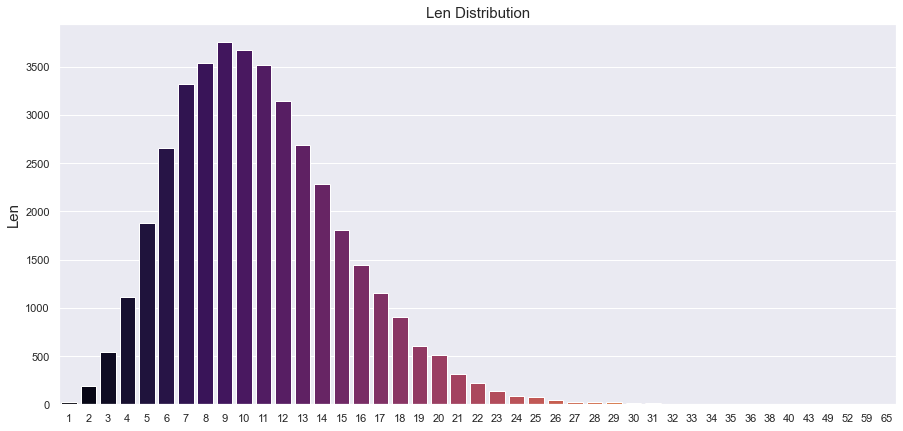

In [15]:
sns.set(rc={'figure.figsize':(15,7),
            'axes.labelsize': 15, 
            'font.size': 20, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(df_1['Len'].value_counts().index,
            df_1['Len'].value_counts(),palette='inferno').set(title='Len Distribution')

In [11]:
a = df_1.groupby(['cuisine']).agg({'Len': [np.count_nonzero,np.min,np.max,np.mean,]})
a

Len                     
             count_nonzero amin amax       mean
cuisine                                        
brazilian              467    2   59   9.528908
british                804    2   30   9.712687
cajun_creole          1546    2   31  12.634541
chinese               2673    2   38  11.994388
filipino               755    2   38  10.006623
french                2646    1   31   9.828798
greek                 1175    1   27  10.194894
indian                3003    1   49  12.708292
irish                  667    2   27   9.308846
italian               7838    1   65   9.934550
jamaican               526    2   35  12.228137
japanese              1423    1   34   9.737878
korean                 830    2   29  11.285542
mexican               6438    1   52  10.902610
moroccan               821    2   31  12.913520
russian                489    2   25  10.235174
southern_us           4320    1   40   9.653009
spanish                989    1   35  10.442872
thai                  1539    1   40  12.556205
vietnamese             825    1   31  12.682424

### Reduce the Size

In [12]:
df_less = df_1[df_1.Len < 16]
print("We have", df_less.shape[0] , "recipes with less than 16 elements, and We had " , df_1.shape[0])

We have 34151 recipes with less than 16 elements, and We had  39774


<Figure size 576x360 with 0 Axes>

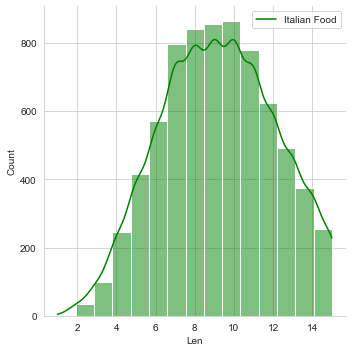

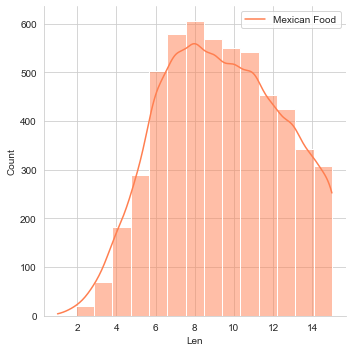

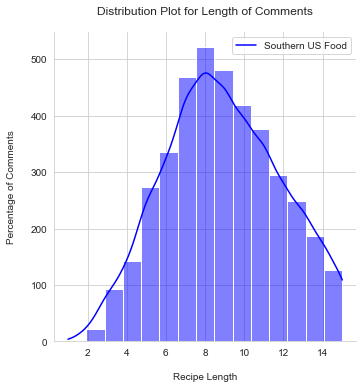

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.displot(df_less.Len[df_1.cuisine == "italian"], kde=True, bins =15, color='green')
plt.legend([ 'Italian Food'])
sns.displot(df_less.Len[df_1.cuisine == "mexican"], kde=True, bins =15,  color='coral')
plt.legend(['Mexican Food'])
sns.displot(df_less.Len[df_1.cuisine == "southern_us"], kde=True, bins =15, color='blue')
plt.legend([ 'Southern US Food'])

plt.title('Distribution Plot for Length of Comments\n')

plt.xlabel('\nRecipe Length')
plt.ylabel('Percentage of Comments\n');

In [14]:
df_less.groupby(['cuisine']).agg({'Len': [np.min,np.max,np.mean, np.count_nonzero]} )

Len                              
             amin amax       mean count_nonzero
cuisine                                        
brazilian       2   15   8.054455           404
british         2   15   8.868852           732
cajun_creole    2   15  10.561082          1146
chinese         2   15  10.676069          2198
filipino        2   15   9.257225           692
french          1   15   8.917539          2389
greek           1   15   9.431925          1065
indian          1   15  10.343420          2181
irish           2   15   8.780604           629
italian         1   15   9.245372          7238
jamaican        2   15  10.208437           403
japanese        1   15   8.762539          1276
korean          2   15  10.198324           716
mexican         1   15   9.431329          5439
moroccan        2   15  10.451670           569
russian         2   15   9.241935           434
southern_us     1   15   8.937563          3988
spanish         1   15   9.471591           880
thai            1   15  10.771357          1194
vietnamese      1   15   9.980969           578

In [15]:
df_less[df_less.Len < 4]

,id,cuisine,ingredients,final,Len
77,4715,vietnamese,"['sweetened condensed milk', 'ice', 'espresso']","sweetened condensed milk , ice , espresso",3
88,17004,korean,"['water', 'barley']","water , barley",2
106,49434,mexican,"['chocolate bars', 'marshmallows', 'cinnamon g...","chocolate bar , marshmallow , cinnamon graham ...",3
143,29853,mexican,"['granulated sugar', 'large egg whites']","granulated sugar , large egg white",2
389,1128,italian,"['kale leaves', 'chicken noodle soup', 'cannel...","kale leaf , chicken noodle soup , cannellini bean",3
...,...,...,...,...,...
39423,35934,japanese,"['mochi', 'soy sauce', 'nori']","mochi , soy sauce , nori",3
39437,23988,british,"['brandy', 'powdered sugar', 'unsalted butter']","brandy , powdered sugar , unsalted butter",3
39450,8882,filipino,"['brown sugar', 'bananas', 'vegetable oil']","brown sugar , banana , vegetable oil",3
39696,10013,mexican,"['warm water', 'masa']","warm water , masa",2


## Filtering Meat - NoMeat // Sugar - NotSugar

In [16]:
import re
def pattern_searcher(search_str:str, search_list:str):

    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'NA'
    return return_str


In [17]:
meat = [' liver ', 'thigh', 'shrimp' , 'steak',  'chorizo', 'sausage', 'pork', 'kosher', 'turkey', 'fillet', 
        'fryer',  'fish', 'loin',  'serrano', 'crab', 'beef',  'burger', 'blood', 'prawn',  'chop', 'cod',  
        'duck',  'lamb', 'oyster', 'tenderloin', 'lard', 'cutlet', 'clam', 'heart', 'rabe', 'shell',  'meat',  
        'salmon', 'ear', 'trout',  "chicken", "pepperoni", "bacon", " ham " ,"veal",  "salami" ,"drumstick" , 
        "breast" ,"goose", "burger",  "lobster", "poultry", "tripe","mutton"]


pattern = '|'.join(meat)

In [18]:
sweet = ['sugar', "chocolate", 'honey' ]

pattern2 = '|'.join(sweet)

In [19]:
df_less['meat'] = df_1['final'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern))


In [20]:
a = [df_less.meat.value_counts()]
a = a[1:11]
a

[]

[Text(0.5, 1.0, 'Ten Meets most frequency')]

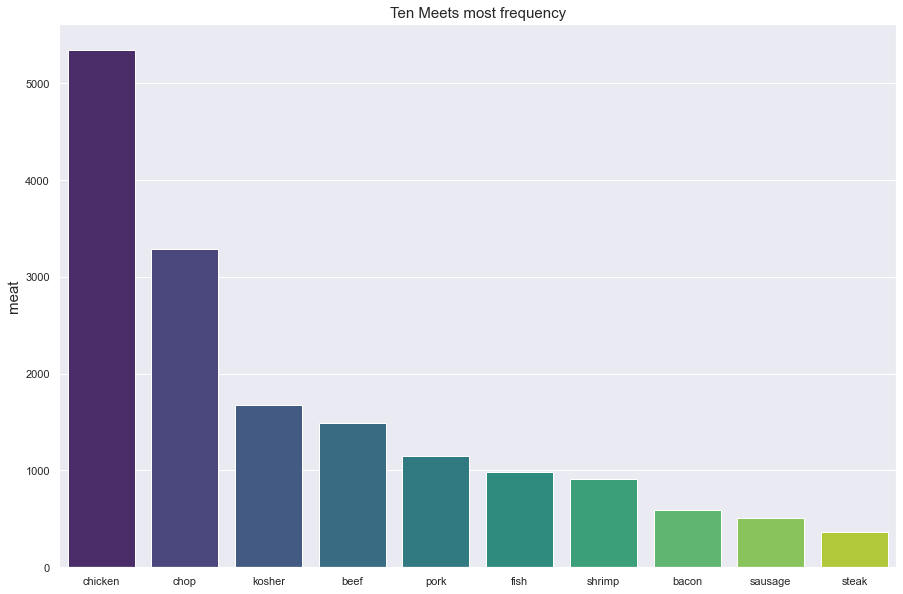

In [21]:
sns.set(rc={'figure.figsize':(15,10),
            'axes.labelsize': 15, 
            'font.size': 20, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(df_less['meat'].value_counts().index[1:11],
            df_less['meat'].value_counts()[1:11],palette='viridis').set(title='Ten Meets most frequency')

In [22]:
df_less['sugar'] = df_1['final'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern2))



In [23]:
nomeat = df_less[df_less['meat'] == "NA"]
nomeat.head(3)

,id,cuisine,ingredients,final,Len,meat,sugar
0,10259,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce , black olive , grape tomato ,...",9,NA,NA
1,25693,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour , ground pepper , salt , tomato , ...",11,NA,NA
3,22213,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water , vegetable oil , wheat , salt",4,NA,NA


[Text(0.5, 1.0, 'Distribution of the NoMeet recipes by cuisine')]

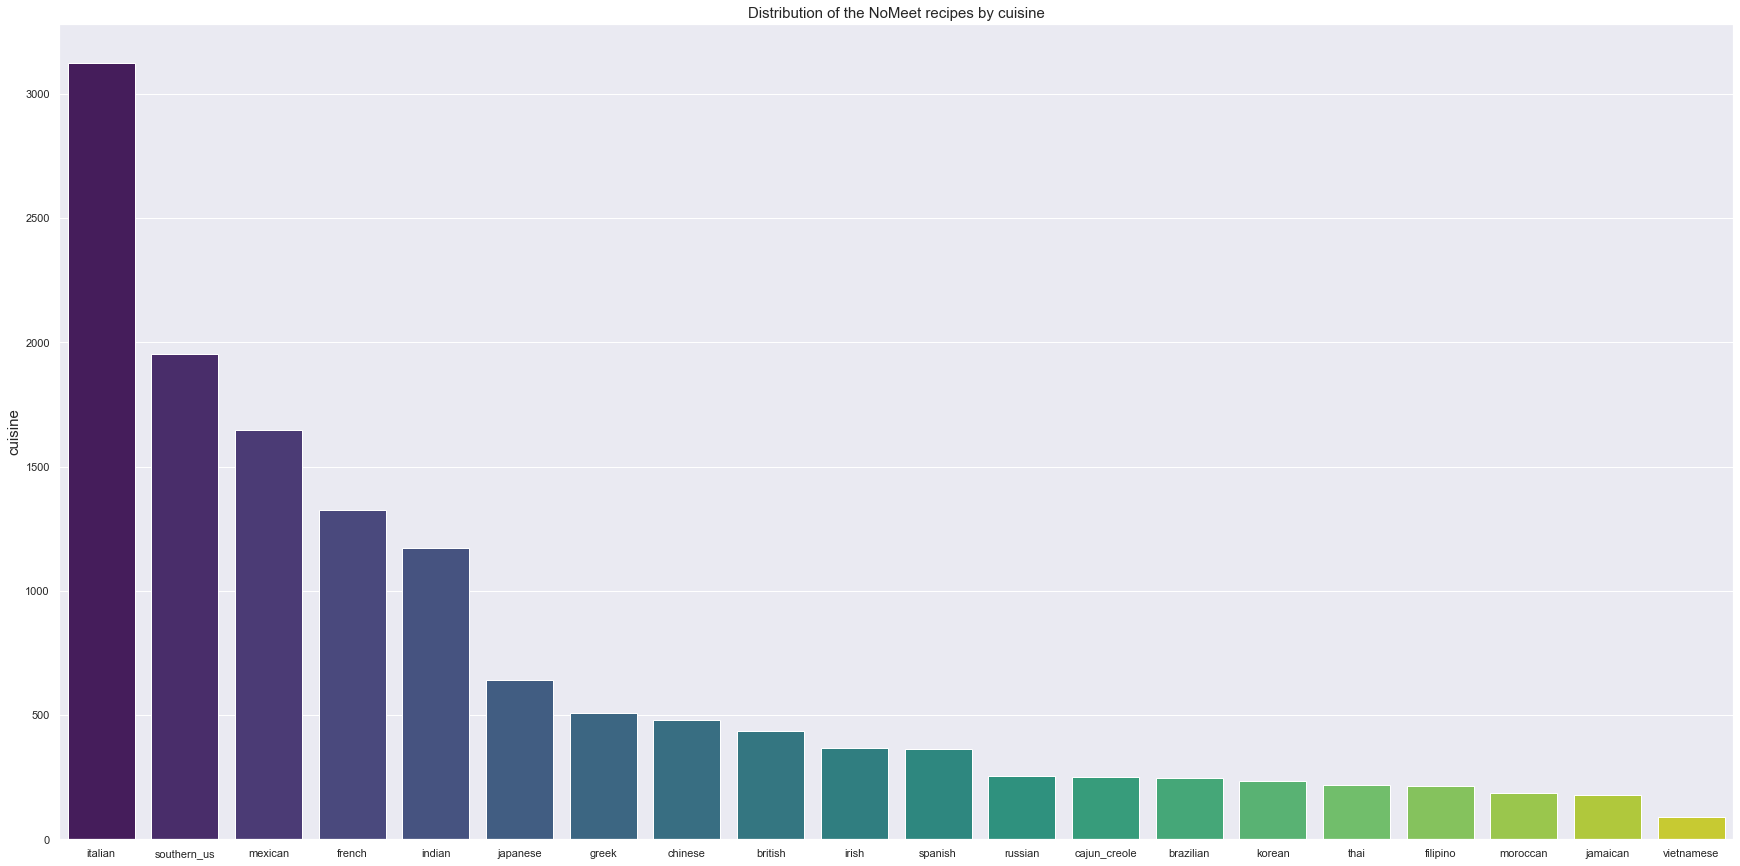

In [24]:
sns.set(rc={'figure.figsize':(30,15),
            'axes.labelsize': 15, 
            'font.size': 15, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(nomeat['cuisine'].value_counts().index,
            nomeat['cuisine'].value_counts(),palette='viridis', ).set(title='Distribution of the NoMeet recipes by cuisine')

In [25]:
meat = df_less[df_less['meat'] != "NA"]
meat.head(3)

,id,cuisine,ingredients,final,Len,meat,sugar
2,20130,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg , pepper , salt , mayonaise , cooking oil ...",12,chicken,NA
6,42779,spanish,"['olive oil', 'salt', 'medium shrimp', 'pepper...","olive oil , salt , medium shrimp , pepper , ga...",13,shrimp,NA
8,16903,mexican,"['olive oil', 'purple onion', 'fresh pineapple...","olive oil , purple onion , fresh pineapple , p...",13,pork,NA


[Text(0.5, 1.0, 'Distribution of the Meet recipes by cuisine')]

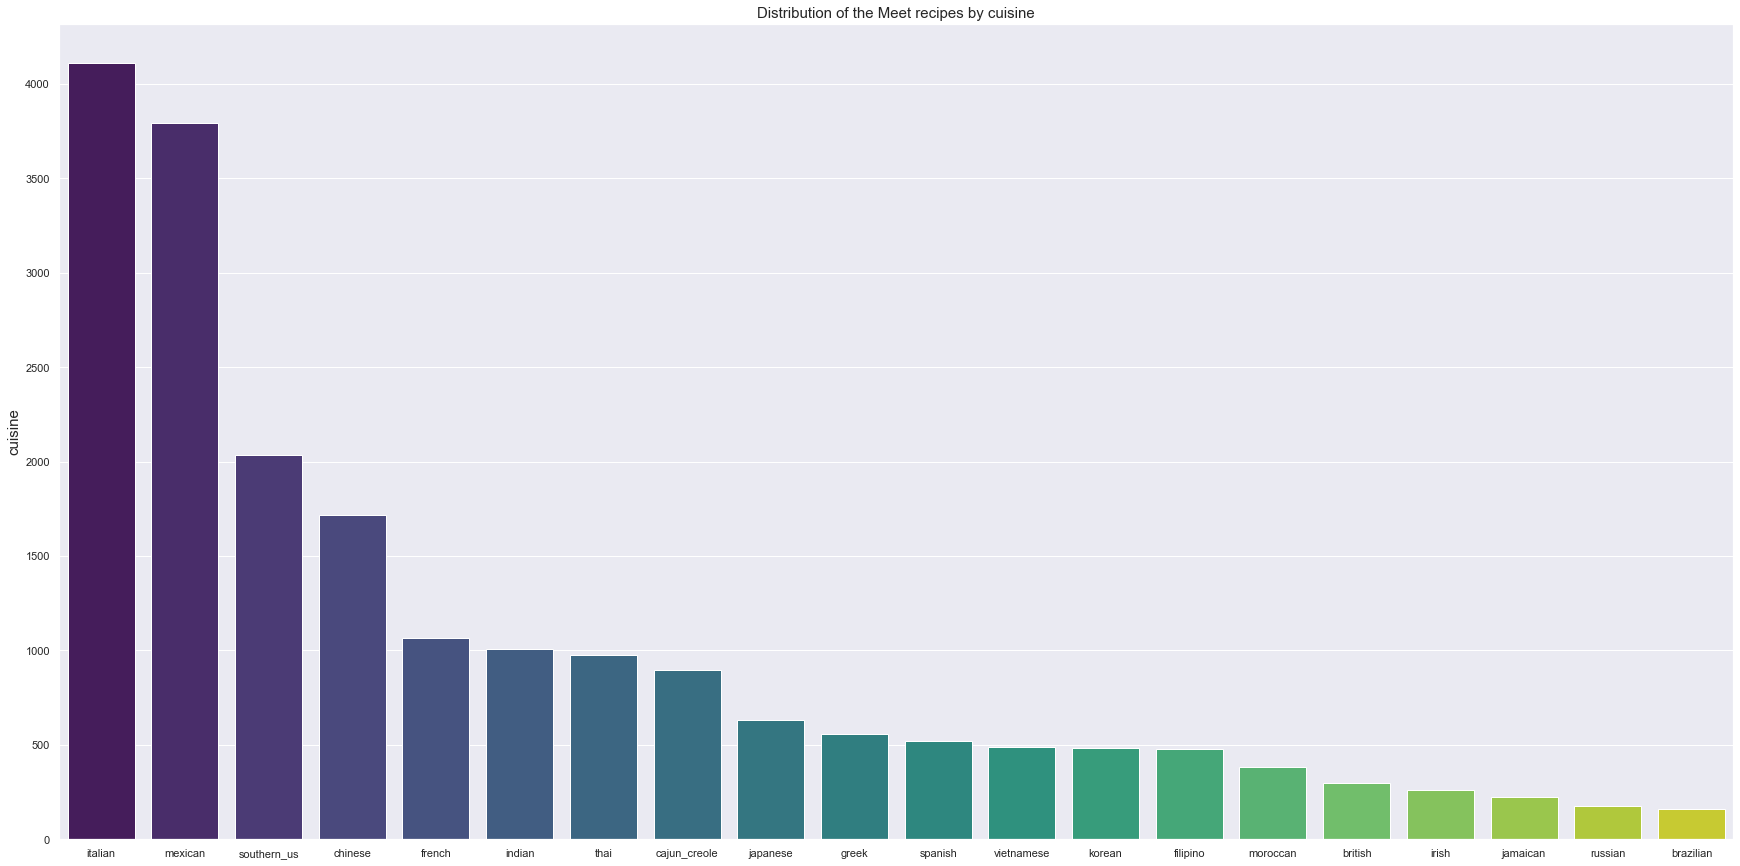

In [26]:
sns.set(rc={'figure.figsize':(30,15),
            'axes.labelsize': 15, 
            'font.size': 15, 
            'legend.fontsize': 12, 
            'axes.titlesize':15,
            'figure.facecolor': 'white',
            'font.family': ['sans-serif'],
            'legend.fancybox': True,
            'lines.color': 'C0',
            'xaxis.labellocation': 'center',
            'xtick.alignment': 'center',
            'legend.title_fontsize': 15,
            'legend.edgecolor': '0.9',
            'animation.ffmpeg_path': 'ffmpeg',
           })    

sns.barplot(meat['cuisine'].value_counts().index,
            meat['cuisine'].value_counts(),palette='viridis').set(title='Distribution of the Meet recipes by cuisine')

# Tagging the ingredients

In [48]:
import nltk
# nltk.download('averaged_perceptron_tagger')
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent



In [49]:
# Add a new column with the preprocess
df_less["prepros"] = df_less["final"].apply(lambda x: preprocess(x))


In [50]:
jj = []
for a in df_less["prepros"]:
    for row in a:
        if 'JJ' in row:
            jj.append(row[0])
jj

['black',
 'garlic',
 'purple',
 'garbanzo',
 'feta',
 'flour',
 'black',
 'green',
 'yellow',
 'vegetable',
 'green',
 'garlic',
 'yellow',
 'vegetable',
 'flour',
 'fresh',
 'olive',
 'garlic',
 'flat',
 'white',
 'white',
 'olive',
 'olive',
 'fresh',
 'black',
 'fresh',
 'garlic',
 'extra',
 'olive',
 'flat',
 'sweet',
 'olive',
 'sharp',
 'swiss',
 'canola',
 'black',
 'low',
 'fresh',
 'dry',
 'green',
 'white',
 'sesame',
 'canola',
 'garlic',
 'red',
 'italian',
 'hot',
 'red',
 'extra',
 'olive',
 'fresh',
 'garlic',
 'fine',
 'flat',
 'fresh',
 'fat',
 'free',
 'fresh',
 'cheese',
 'ground',
 'black',
 'fat',
 'free',
 'vegetable',
 'red',
 'red',
 'sweet',
 'greek',
 'lemon',
 'italian',
 'zesty',
 'italian',
 'hot',
 'asian',
 'lime',
 'vegetable',
 'red',
 'yellow',
 'garlic',
 'green',
 'fresh',
 'creamy',
 'fresh',
 'thai',
 'purple',
 'low',
 'red',
 'yellow',
 'extra',
 'arrowroot',
 'fresh',
 'sesame',
 'red',
 'flat',
 'olive',
 'red',
 'olive',
 'lemon',
 'lo',
 'li

In [51]:
nn = []
for a in df_less["prepros"]:
    for row in a:
        if 'NN' in row:
            nn.append(row[0])
nn

['romaine',
 'lettuce',
 'olive',
 'grape',
 'tomato',
 'pepper',
 'onion',
 'bean',
 'cheese',
 'ground',
 'pepper',
 'salt',
 'tomato',
 'ground',
 'pepper',
 'thyme',
 'egg',
 'tomato',
 'corn',
 'meal',
 'milk',
 'oil',
 'egg',
 'pepper',
 'salt',
 'mayonaise',
 'oil',
 'chicken',
 'breast',
 'powder',
 'onion',
 'soy',
 'sauce',
 'butter',
 'liver',
 'water',
 'oil',
 'wheat',
 'salt',
 'sugar',
 'butter',
 'egg',
 'ginger',
 'root',
 'salt',
 'ground',
 'cinnamon',
 'milk',
 'vanilla',
 'extract',
 'ground',
 'ginger',
 'sugar',
 'powder',
 'oil',
 'salt',
 'medium',
 'shrimp',
 'pepper',
 'cilantro',
 'jalapeno',
 'leaf',
 'parsley',
 'skirt',
 'steak',
 'vinegar',
 'sea',
 'salt',
 'bay',
 'leaf',
 'chorizo',
 'sausage',
 'sugar',
 'pistachio',
 'nut',
 'almond',
 'bark',
 'flour',
 'vanilla',
 'extract',
 'oil',
 'almond',
 'extract',
 'egg',
 'powder',
 'cranberry',
 'oil',
 'purple',
 'onion',
 'pineapple',
 'pork',
 'poblano',
 'pepper',
 'corn',
 'tortilla',
 'cheddar',
 '

In [52]:
vocabjj = Counter(jj)
vocabnn = Counter(nn)

In [53]:
vocabjj.most_common(15)

[('fresh', 12249),
 ('garlic', 11496),
 ('olive', 9532),
 ('black', 7929),
 ('red', 6580),
 ('green', 6272),
 ('white', 6256),
 ('large', 4553),
 ('vegetable', 4361),
 ('extra', 2611),
 ('unsalted', 2495),
 ('dry', 2445),
 ('parmesan', 2073),
 ('lemon', 2070),
 ('low', 1742)]

In [54]:
vocabnn.most_common(15)

[('salt', 19532),
 ('pepper', 19315),
 ('oil', 18231),
 ('onion', 14041),
 ('ground', 12488),
 ('sugar', 10448),
 ('sauce', 9880),
 ('cheese', 9595),
 ('tomato', 7860),
 ('water', 7598),
 ('egg', 7595),
 ('butter', 7295),
 ('powder', 5924),
 ('clove', 5866),
 ('chicken', 5587)]

In [ ]:
df_less

# Searching for Marcks

In [35]:
import spacy
from spacy import displacy
from collections import Counter

## Spanish corpus (https://spacy.io/models/es#es_core_news_md)
# python -m spacy download es
import es_core_news_sm
nlp_sp = es_core_news_sm.load()
nlp_sp

## English corpus
#python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp

In [36]:
df_less["prepros2"] = df_less["final"].apply(lambda x: nlp(x))


In [37]:
a=[]
for row in df_less["ingredients"]:
    doc = nlp(row)
    a += [(X.text, X.label_) for X in doc.ents]


In [38]:
a

[("romaine lettuce'", 'PERSON'),
 ("cilantro'", 'ORG'),
 ("white almond bark'", 'ORG'),
 ("powder'", 'ORG'),
 ('cilantro fresh', 'PERSON'),
 ('oregano', 'PERSON'),
 ('swiss', 'NORP'),
 ("canola oil'", 'PRODUCT'),
 ("mustard'", 'ORG'),
 ('canola', 'PRODUCT'),
 ("'Shaoxing", 'WORK_OF_ART'),
 ('Italian', 'NORP'),
 ("parmesan cheese'", 'ORG'),
 ("gruyere cheese'", 'PERSON'),
 ('greek', 'NORP'),
 ('sugar', 'PERSON'),
 ('italian', 'NORP'),
 ('italian', 'NORP'),
 ('asian', 'NORP'),
 ("red bell pepper'", 'ORG'),
 ('chili', 'GPE'),
 ('broccolini', 'PERSON'),
 ("cilantro fresh'", 'PERSON'),
 ('hoisin', 'GPE'),
 ('peanut butter', 'PERSON'),
 ("thai basil'", 'ORG'),
 ("rice noodles'", 'PERSON'),
 ('cilantro', 'PERSON'),
 ("orange bell pepper'", 'ORG'),
 ("powder'", 'ORG'),
 ("marinara sauce'", 'PERSON'),
 ('lemon zest', 'PERSON'),
 ("lo mein noodles'", 'PERSON'),
 ("parmesan cheese'", 'ORG'),
 ("green bell pepper'", 'PERSON'),
 ("'egg roll wrappers'", 'WORK_OF_ART'),
 ("parmesan cheese'", 'ORG'),


In [39]:
print([(X) for X in a if 'ORG' in X])

[("cilantro'", 'ORG'), ("white almond bark'", 'ORG'), ("powder'", 'ORG'), ("mustard'", 'ORG'), ("parmesan cheese'", 'ORG'), ("red bell pepper'", 'ORG'), ("thai basil'", 'ORG'), ("orange bell pepper'", 'ORG'), ("powder'", 'ORG'), ("parmesan cheese'", 'ORG'), ("parmesan cheese'", 'ORG'), ("chili powder'", 'ORG'), ("garlic powder'", 'ORG'), ("powder'", 'ORG'), ("Johnsonville Andouille Dinner Sausage'", 'ORG'), ("chili powder'", 'ORG'), ("chile powder'", 'ORG'), ("powder'", 'ORG'), ("chile'", 'ORG'), ("orange liqueur'", 'ORG'), ("powder'", 'ORG'), ("soda'", 'ORG'), ("powder'", 'ORG'), ("red bell pepper'", 'ORG'), ("['orange juice concentrate'", 'ORG'), ("parmesan cheese'", 'ORG'), ("mozzarella cheese'", 'ORG'), ("red bell pepper'", 'ORG'), ("powder'", 'ORG'), ("orange'", 'ORG'), ("mustard'", 'ORG'), ("powder'", 'ORG'), ("bell pepper'", 'ORG'), ("blue cheese'", 'ORG'), ("quarters'", 'ORG'), ("parmesan cheese'", 'ORG'), ("chicken soup'", 'ORG'), ("red bell pepper'", 'ORG'), ("cheddar cheese 

# Vectorizer and Clustering

## Clustering without a Cuisine Type

In [55]:
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df_less['final'])

train_vectors

a = train_vectors.todense()

unidades_datos = np.array(a)
unidades_datos


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# I transform the array into a DF 

In [56]:
new_df = pd.DataFrame(unidades_datos)

In [57]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.cluster import KMeans
inertia =[]

In [50]:


###Static code to get max no of clusters

for i in range(1,10):
    kmeans = KMeans(n_clusters= i,random_state = 43)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

In [51]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertia, curve="convex", direction="decreasing")
print('The elbow point of your model is:', kl.elbow)

The elbow point of your model is: 4


In [59]:
kmeansmodel = KMeans(n_clusters= 4, random_state=0)
y_kmeans= kmeansmodel.fit_predict(new_df)

In [60]:
df_less['cluster_id'] = y_kmeans
df_less

,id,cuisine,ingredients,final,Len,meat,sugar,prepros,cluster_id
0,10259,greek,"['romaine lettuce', 'black olives', 'grape tom...","romaine lettuce , black olive , grape tomato ,...",9,NA,NA,"[(romaine, NN), (lettuce, NN), (,, ,), (black,...",3
1,25693,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma...","plain flour , ground pepper , salt , tomato , ...",11,NA,NA,"[(plain, RB), (flour, JJ), (,, ,), (ground, NN...",2
2,20130,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...","egg , pepper , salt , mayonaise , cooking oil ...",12,chicken,NA,"[(egg, NN), (,, ,), (pepper, NN), (,, ,), (sal...",0
3,22213,indian,"['water', 'vegetable oil', 'wheat', 'salt']","water , vegetable oil , wheat , salt",4,NA,NA,"[(water, NN), (,, ,), (vegetable, JJ), (oil, N...",3
5,6602,jamaican,"['plain flour', 'sugar', 'butter', 'eggs', 'fr...","plain flour , sugar , butter , egg , fresh gin...",12,NA,sugar,"[(plain, RB), (flour, JJ), (,, ,), (sugar, NN)...",1
...,...,...,...,...,...,...,...,...,...
39768,7377,mexican,"['shredded cheddar cheese', 'crushed cheese cr...","shredded cheddar cheese , crushed cheese crack...",10,chicken,NA,"[(shredded, VBN), (cheddar, NN), (cheese, NN),...",3
39769,29109,irish,"['light brown sugar', 'granulated sugar', 'but...","light brown sugar , granulated sugar , butter ...",12,NA,sugar,"[(light, JJ), (brown, NN), (sugar, NN), (,, ,)...",1
39770,11462,italian,"['KRAFT Zesty Italian Dressing', 'purple onion...","kraft zesty italian dressing , purple onion , ...",7,NA,NA,"[(kraft, NN), (zesty, NN), (italian, JJ), (dre...",3
39771,2238,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough...","egg , citrus fruit , raisin , sourdough starte...",12,NA,sugar,"[(egg, NN), (,, ,), (citrus, NN), (fruit, NN),...",1


In [55]:
df_less['cluster_id'].value_counts()

3    13642
2    11202
1     4804
0     4503
Name: cluster_id, dtype: int64

In [56]:
c2= df_less[df_less['cluster_id'] == 2]

In [57]:
c2['cuisine'].value_counts()

italian         3688
mexican         1888
indian           885
southern_us      868
french           691
greek            628
cajun_creole     626
spanish          498
moroccan         370
jamaican         177
thai             140
filipino         125
brazilian        121
irish            101
british           87
russian           85
chinese           81
japanese          57
vietnamese        53
korean            33
Name: cuisine, dtype: int64

In [58]:
c2.groupby(['cuisine'])["Len"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,121.0,12.074380,2.284605,6.0,11.0,12.0,14.0,15.0
british,87.0,11.885057,2.222639,6.0,10.0,12.0,14.0,15.0
cajun_creole,626.0,11.926518,2.286174,4.0,10.0,12.0,14.0,15.0
chinese,81.0,10.617284,2.272487,4.0,9.0,11.0,12.0,15.0
filipino,125.0,10.584000,2.369783,4.0,9.0,11.0,12.0,15.0
french,691.0,10.995658,2.563678,4.0,9.0,11.0,13.0,15.0
greek,628.0,10.767516,2.409463,4.0,9.0,11.0,12.0,15.0
indian,885.0,12.310734,2.108362,5.0,11.0,13.0,14.0,15.0
irish,101.0,11.346535,2.355571,5.0,10.0,11.0,13.0,15.0


In [59]:
c0= df_less[df_less['cluster_id'] == 0]

In [60]:
c0.groupby(['cuisine'])["Len"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,3.0,11.666667,3.214550,8.0,10.50,13.0,13.50,14.0
british,4.0,12.500000,2.081666,10.0,11.50,12.5,13.50,15.0
cajun_creole,45.0,11.755556,2.287869,7.0,10.00,12.0,13.00,15.0
chinese,1758.0,11.387941,2.531242,3.0,10.00,12.0,13.00,15.0
filipino,282.0,10.496454,2.348996,5.0,9.00,10.0,12.00,15.0
french,11.0,11.727273,2.101947,8.0,11.00,12.0,13.00,15.0
greek,4.0,11.000000,2.943920,8.0,9.50,10.5,12.00,15.0
indian,23.0,11.086957,2.592174,6.0,9.00,11.0,14.00,15.0
irish,4.0,12.750000,3.862210,7.0,12.25,14.5,15.00,15.0


In [61]:
c0['cuisine'].value_counts()

chinese         1758
thai             720
japanese         601
korean           505
vietnamese       321
filipino         282
southern_us       90
mexican           68
cajun_creole      45
jamaican          36
indian            23
italian           19
french            11
spanish            6
greek              4
british            4
irish              4
russian            3
brazilian          3
Name: cuisine, dtype: int64

In [62]:
c1= df_less[df_less['cluster_id'] == 1]

In [62]:
c1.groupby(['cuisine'])["Len"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,51.0,7.686275,2.664509,4.0,5.50,7.0,10.00,14.0
british,348.0,9.224138,2.885179,3.0,7.00,9.0,11.00,15.0
cajun_creole,117.0,9.897436,2.624108,4.0,8.00,10.0,12.00,15.0
chinese,77.0,9.000000,2.650720,4.0,7.00,9.0,11.00,15.0
filipino,83.0,7.638554,2.116015,3.0,6.00,7.0,9.00,13.0
french,795.0,8.881761,2.789167,2.0,7.00,9.0,11.00,15.0
greek,78.0,9.782051,2.299901,5.0,8.00,10.0,11.00,15.0
indian,117.0,8.974359,2.419253,4.0,7.00,9.0,11.00,15.0
irish,245.0,9.138776,2.820651,3.0,7.00,9.0,12.00,15.0


In [63]:
c1= df_less[df_less['cluster_id'] == 1]
c2= df_less[df_less['cluster_id'] == 2]
c3= df_less[df_less['cluster_id'] == 3]
c0= df_less[df_less['cluster_id'] == 0]

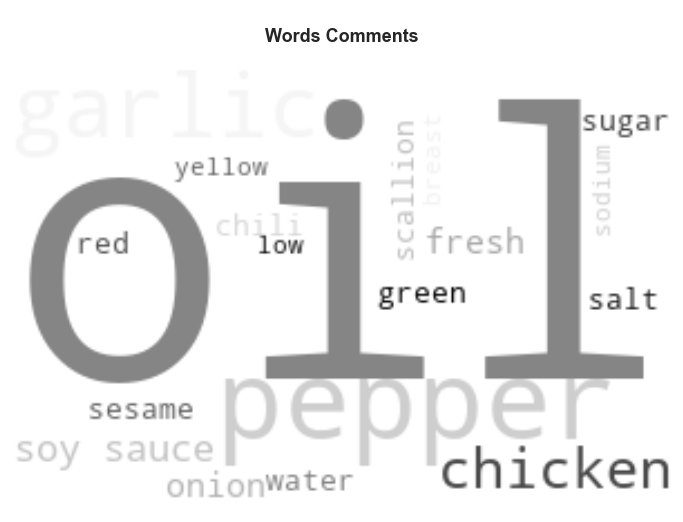

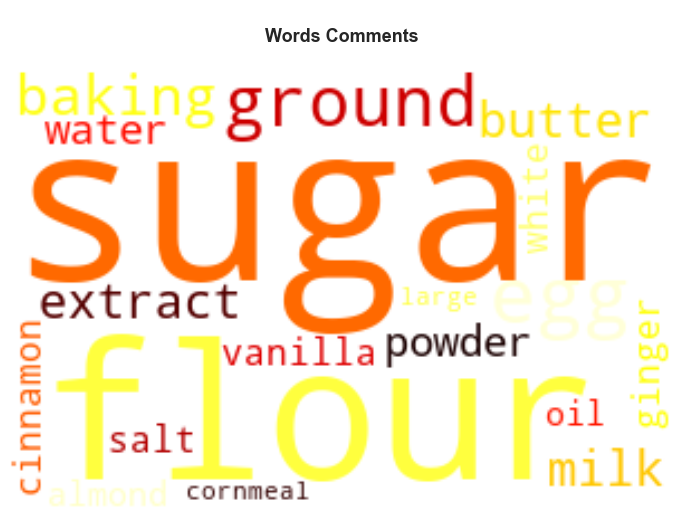

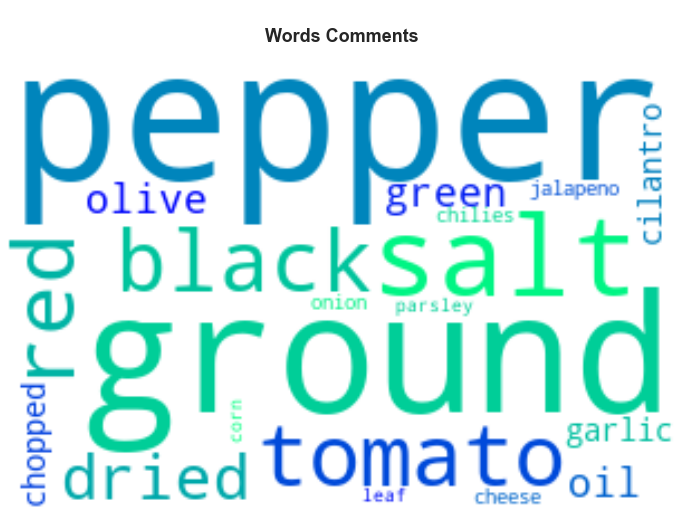

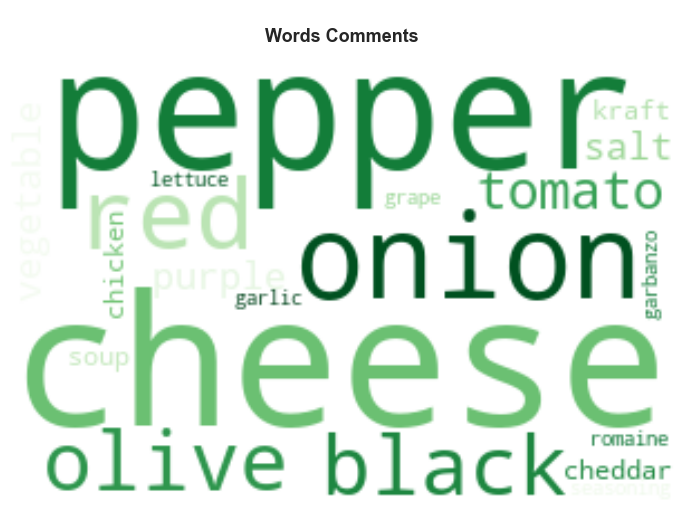

In [81]:
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c0.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'gray' , random_state=17), '\nWords')
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c1.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'hot' , random_state=17), '\nWords')
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c2.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'winter' , random_state=17), '\nWords')
wordcloud = WordCloud(max_font_size=200, max_words=20, background_color="white",
                      
                      width= 300, height = 200,
                      stopwords = stopwords.words('english')).generate(str(c3.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'Greens' , random_state=17), '\nWords')

## Clustering with cuisine

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
new_df['Country'] = lb_make.fit_transform(df_less['cuisine'])

new_df

In [ ]:
new_df.Country.value_counts()

In [ ]:
from sklearn import preprocessing 

X = new_df

scaler = preprocessing.MinMaxScaler()
#pd.read_csv()
scaler

df_sc = scaler.fit_transform(X)

df_sc

In [ ]:
from sklearn.cluster import KMeans
inertia =[]

###Static code to get max no of clusters

for i in range(1,10):
    kmeans = KMeans(n_clusters= i,random_state = 43)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

In [ ]:
df_sc = pd.DataFrame(df_sc, columns = X.columns) 

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertia, curve="convex", direction="decreasing")
print('The elbow point of your model is:', kl.elbow)

In [ ]:
kmeansmodel = KMeans(n_clusters= 6, random_state=0)
y_kmeans= kmeansmodel.fit_predict(df_sc)

In [ ]:
df_less['cluster_id'] = y_kmeans
df_less

In [ ]:
c2.cuisine.value_counst()

# Topic Modeling

In [27]:
text_list = [i.split(' ') for i in df_less.final if i != ',']

In [28]:
text_list

[['romaine',
  'lettuce',
  ',',
  'black',
  'olive',
  ',',
  'grape',
  'tomato',
  ',',
  'garlic',
  ',',
  'pepper',
  ',',
  'purple',
  'onion',
  ',',
  'seasoning',
  ',',
  'garbanzo',
  'bean',
  ',',
  'feta',
  'cheese',
  'crumbles'],
 ['plain',
  'flour',
  ',',
  'ground',
  'pepper',
  ',',
  'salt',
  ',',
  'tomato',
  ',',
  'ground',
  'black',
  'pepper',
  ',',
  'thyme',
  ',',
  'egg',
  ',',
  'green',
  'tomato',
  ',',
  'yellow',
  'corn',
  'meal',
  ',',
  'milk',
  ',',
  'vegetable',
  'oil'],
 ['egg',
  ',',
  'pepper',
  ',',
  'salt',
  ',',
  'mayonaise',
  ',',
  'cooking',
  'oil',
  ',',
  'green',
  'chilies',
  ',',
  'grilled',
  'chicken',
  'breast',
  ',',
  'garlic',
  'powder',
  ',',
  'yellow',
  'onion',
  ',',
  'soy',
  'sauce',
  ',',
  'butter',
  ',',
  'chicken',
  'liver'],
 ['water', ',', 'vegetable', 'oil', ',', 'wheat', ',', 'salt'],
 ['plain',
  'flour',
  ',',
  'sugar',
  ',',
  'butter',
  ',',
  'egg',
  ',',
  'fresh',

In [29]:
text_list = [i for i in text_list if i != ',' or ', ']
#[variable_name for variable_name in original_list if condition

In [33]:
# Step 1. Build our own dictionary, and save it for future use
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(text_list)#
dictionary.save('dictionary.dict')
print (dictionary)

Dictionary(2699 unique tokens: [',', 'bean', 'black', 'cheese', 'crumbles']...)


In [34]:
# Step 2. Vectorize the characters

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]


In [35]:
# Step 2.2. Create and save the gensim Corpus from the processed dictionary
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

34151
[(0, 13), (7, 1), (12, 2), (24, 1), (26, 1), (31, 1), (32, 1), (39, 1), (40, 1), (47, 1), (50, 1), (58, 1), (66, 1), (98, 1), (100, 1), (129, 1), (152, 2), (180, 1), (273, 1), (310, 1), (414, 1), (415, 1), (416, 1), (417, 1)]


In [82]:
# Step 3. Perform the LDA model
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, 
               passes=50)

In [83]:
ldamodel.print_topics(num_topics= 10, num_words = 19)

[(0,
  '0.326*"," + 0.048*"cheese" + 0.037*"pepper" + 0.031*"olive" + 0.030*"tomato" + 0.028*"oil" + 0.027*"fresh" + 0.027*"garlic" + 0.023*"parmesan" + 0.022*"basil" + 0.022*"salt" + 0.021*"grated" + 0.019*"dried" + 0.015*"ground" + 0.015*"black" + 0.013*"red" + 0.013*"oregano" + 0.012*"onion" + 0.012*"crushed"'),
 (1,
  '0.156*"," + 0.098*"cheese" + 0.053*"cream" + 0.047*"chicken" + 0.045*"shredded" + 0.039*"breast" + 0.033*"cheddar" + 0.030*"sauce" + 0.027*"boneless" + 0.027*"sour" + 0.026*"skinless" + 0.025*"half" + 0.018*"fat" + 0.018*"seasoning" + 0.012*"jack" + 0.012*"mix" + 0.011*"pecan" + 0.010*"condensed" + 0.010*"flour"'),
 (2,
  '0.153*"pork" + 0.133*"yogurt" + 0.100*"plain" + 0.079*"seasoning" + 0.076*"fillet" + 0.058*"greek" + 0.053*"cajun" + 0.045*"salmon" + 0.045*"chop" + 0.040*"nonfat" + 0.039*"tenderloin" + 0.035*"yoghurt" + 0.030*"loin" + 0.024*"spice" + 0.007*"smoked" + 0.007*"jerk" + 0.006*"kielbasa" + 0.004*"jamaican" + 0.004*"rub"'),
 (3,
  '0.347*"," + 0.082*"fl

In [84]:
## Let's save the model for the future 
ldamodel.save('topic.model')
## load saved model
from gensim.models import LdaModel
model_loaded = LdaModel.load('topic.model')

In [85]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus_s.mm')
lda = gensim.models.LdaModel.load('topic.model')


data = pyLDAvis.gensim.prepare(lda, c, d)

In [86]:
data

d:\anaconda\envs\dataanalytic\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.125193  0.036553       1        1  20.270976
5      0.125266  0.056015       2        1  19.993476
7      0.128022 -0.010105       3        1  18.818008
0      0.115751  0.063722       4        1  11.383070
3      0.134211 -0.062150       5        1   8.483623
4      0.114304 -0.070704       6        1   7.701900
1      0.008927 -0.126635       7        1   5.667545
9      0.063319  0.058995       8        1   4.045241
8     -0.378756  0.345071       9        1   2.632972
2     -0.436236 -0.290761      10        1   1.003188, topic_info=          Term           Freq          Total Category  logprob  loglift
0            ,  287585.000000  287585.000000  Default  30.0000  30.0000
46       fresh   13782.000000   13782.000000  Default  29.0000  29.0000
113      juice    6123.000000    6123.000000  Default  28.0000  28.0000
3       cheese    9999.000000    9999.000000  Default  27.0000  27.0000
114      lemon    5282.000000    5282.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
109     fillet     691.412618    1182.005375  Topic10  -2.5773   4.0658
220      spice     222.505429     505.716262  Topic10  -3.7111   3.7810
15   seasoning     719.755940    2075.169852  Topic10  -2.5371   3.5431
242     smoked      65.665123     616.740184  Topic10  -4.9315   2.3621
183      light      18.290098    1181.197870  Topic10  -6.2097   0.4341

[574 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.217762     ,
0         2  0.230088     ,
0         3  0.200921     ,
0         4  0.117137     ,
0         5  0.092738     ,
...     ...       ...   ...
2290      9  0.906963   yum
179       1  0.215229  zest
179       4  0.215229  zest
179       6  0.568996  zest
1414      4  0.967984  ziti

[729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 8, 1, 4, 5, 2, 10, 9, 3])

# WordCloud

In [37]:
italian = df_less[df_less.cuisine == "italian"]
mexican = df_less[df_less.cuisine == "mexican"]
southern_us = df_less[df_less.cuisine == "southern_us"]
indian = df_less[df_less.cuisine == "indian"]
chinese = df_less[df_less.cuisine == "chinese"]
french = df_less[df_less.cuisine == "french"]
cajun_creole = df_less[df_less.cuisine == "cajun_creole"]
thai  = df_less[df_less.cuisine == "thai"]
japanese= df_less[df_less.cuisine == "japanese"]
greek = df_less[df_less.cuisine == "greek"]
spanish = df_less[df_less.cuisine == "spanish"]
korean = df_less[df_less.cuisine == "korean"]
vietnamese = df_less[df_less.cuisine == "vietnamese"]
moroccan = df_less[df_less.cuisine == "moroccan"]
british = df_less[df_less.cuisine == "british"]
filipino = df_less[df_less.cuisine == "filipino"]
irish  = df_less[df_less.cuisine == "irish"]
jamaican = df_less[df_less.cuisine == "jamaican"]
russian = df_less[df_less.cuisine == "russian"]
brazilian = df_less[df_less.cuisine == "brazilian"] 

In [39]:
ita = np.array(Image.open(requests.get('https://img2.freepng.es/20180404/azq/kisspng-italy-vector-map-the-seven-wonders-5ac55fcd89ce32.5470960615228845575645.jpg', stream=True).raw))
mex = np.array(Image.open(requests.get('https://cdn1.vectorstock.com/i/1000x1000/55/10/mexico-solid-black-silhouette-map-of-country-vector-21655510.jpg', stream=True).raw))
sou = np.array(Image.open(requests.get('https://st2.depositphotos.com/2567911/8292/v/950/depositphotos_82920302-stock-illustration-black-silhouette-map-of-united.jpg', stream=True).raw))


ind = np.array(Image.open(requests.get('https://w7.pngwing.com/pngs/693/612/png-transparent-india-blank-map-line-art-monochrome-india-world.png', stream=True).raw))
chi =  np.array(Image.open(requests.get('https://cdn2.vectorstock.com/i/1000x1000/63/06/map-of-china-vector-20546306.jpg', stream=True).raw))
#french = df_1[df_1.cuisine == "french"]
#cajun_creole = df_1[df_1.cuisine == "cajun_creole"]
#thai  = df_1[df_1.cuisine == "thai"]
#japanese= df_1[df_1.cuisine == "japanese"]
#greek = df_1[df_1.cuisine == "greek"]
#spanish = df_1[df_1.cuisine == "spanish"]
#korean = df_1[df_1.cuisine == "korean"]
#vietnamese = df_1[df_1.cuisine == "vietnamese"]
#moroccan = df_1[df_1.cuisine == "moroccan"]
#british = df_1[df_1.cuisine == "british"]
#filipino = df_1[df_1.cuisine == "filipino"]
#irish  = df_1[df_1.cuisine == "irish"]
#jamaican = df_1[df_1.cuisine == "jamaican"]
#russian = df_1[df_1.cuisine == "russian"]
#brazilian = = np.array(Image.open(requests.get('https://i.pinimg.com/originals/f2/94/4f/f2944f132ac16b8dedc74d3f77249420.jpg', stream=True).raw))

In [40]:
from wordcloud import WordCloud, STOPWORDS 

In [41]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

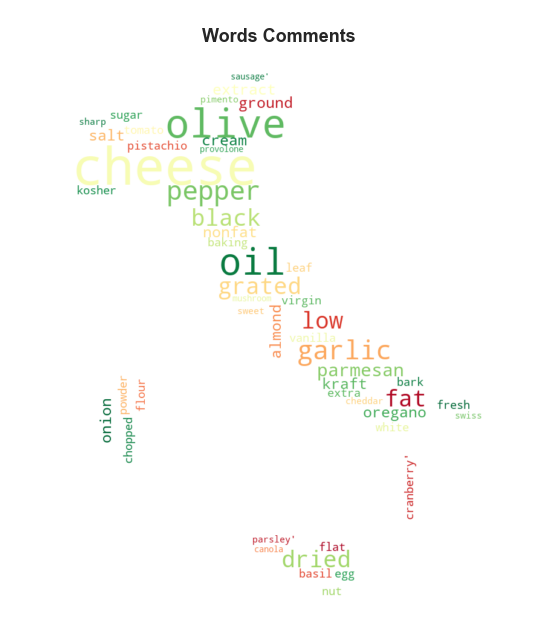

In [42]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=ita ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(italian.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'RdYlGn' , random_state=17), '\nWords')

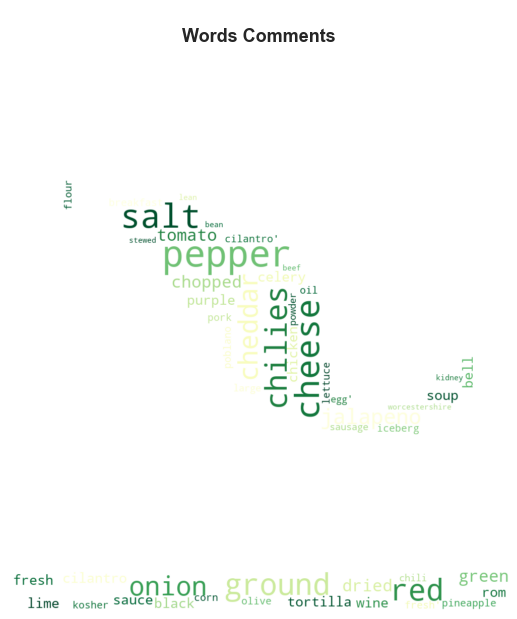

In [43]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=mex ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(mexican.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'YlGn' , random_state=17), '\nWords')

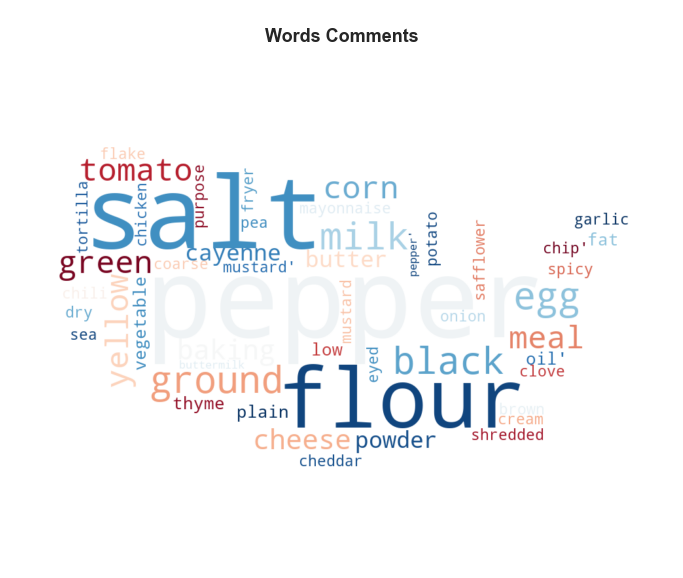

In [44]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=sou ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(southern_us.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'RdBu' , random_state=17), '\nWords')

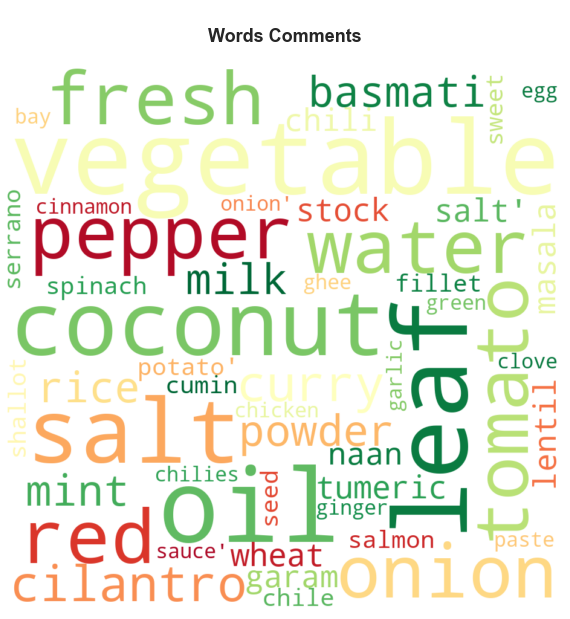

In [45]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=ind ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(indian.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'RdYlGn' , random_state=17), '\nWords')

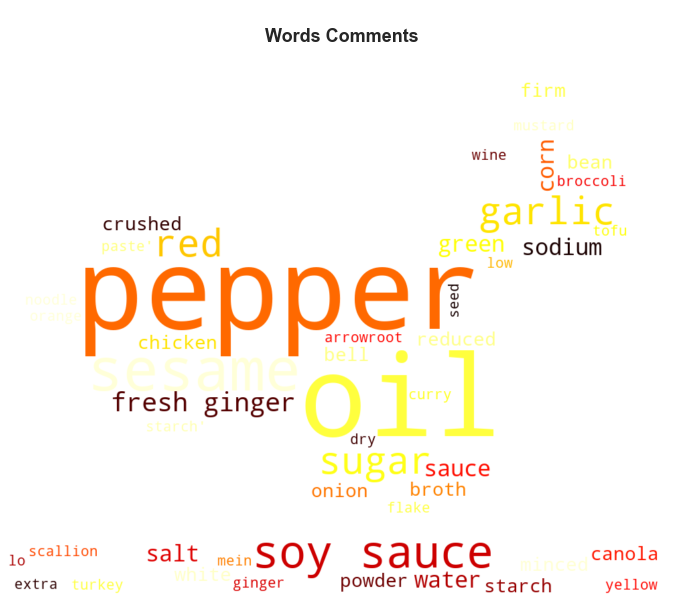

In [46]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white",
                      mask=chi ,width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(chinese.final.values))

plot_wordcloud(wordcloud.recolor( colormap= 'hot' , random_state=17), '\nWords')

# Bag of words